<a href="https://colab.research.google.com/github/PrithviGupta/placement-predictor/blob/main/placement_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [13]:
df=pd.read_csv("/content/placement.csv")

In [14]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [15]:
df.shape

(100, 4)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [17]:
df=df.iloc[:,1:]

In [18]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [20]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [21]:
import matplotlib.pyplot as plt


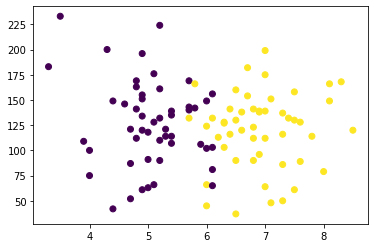

In [23]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [30]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [27]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [31]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
X_train=scaler.fit_transform(X_train)

In [49]:
X_test=scaler.transform(X_test)

In [52]:
X_test

array([[ 2.23758183, -0.08302317],
       [ 1.17860358, -0.93841337],
       [ 0.38436989, -0.18365731],
       [-0.93935293,  1.82902552],
       [ 0.91385901, -1.49190114],
       [-0.76285656,  1.32585481],
       [ 0.56086626, -0.08302317],
       [-1.02760112,  0.99879385],
       [-0.67460837, -0.83777923],
       [ 0.47261807,  0.16856219]])

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf=LogisticRegression()

In [57]:
clf.fit(X_train,y_train)

LogisticRegression()

In [74]:
y_pred=clf.predict(X_test)

In [75]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [68]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test,y_pred)

1.0

In [78]:
from mlxtend.plotting import plot_decision_regions


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


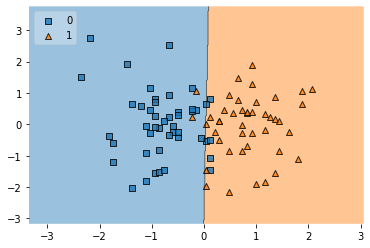

In [80]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)


In [81]:
import pickle

In [82]:
pickle.dump(clf,open('model.pkl','wb'))
